## Load Dataset

In [2902]:
import pandas as pd
import random as rd
import numpy as np
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [2903]:
# df.info()
df['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

## PART1: Data Cleaning

In [2904]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 

# Checking the Missing Values

# A function used to fill missing data from the same column randomly
def random_FillMissingData(_df: pd.DataFrame) -> pd.DataFrame:
    df = _df.copy()
    for column in df.columns:
        data = df[column].copy()
        empty_rows = data.isnull()
        data[empty_rows] = rd.choices(data[~empty_rows].values, k = empty_rows.sum())
        df[column] = data
    return df

df = random_FillMissingData(df)

# DEBUG ONLY
# df.to_csv("./temp/temp1.csv", index=False) 
# print(df['Self_Employed'].value_counts())
# print(df.isnull().sum())

## PART2: Encode 




In [2905]:
# Task2 deal with categorical features

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# print(df.head())
# Loan_ID  Gender  Married  Dependents  Education  Self_Employed 

# ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term

# Credit_History  Property_Area
# df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,11]], axis=1, inplace=True)
df.drop(df.columns[[0, 1, 2, 4, 8]], axis=1, inplace=True)
# df.drop(df.columns[[0]], axis=1, inplace=True)

df = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))).round(4)

# DEBUG ONLY
# df.to_csv("./temp/temp2.csv", index=False) 


## PART3: Data Process

In [2906]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

def random_Split_data(data: pd.DataFrame, rate = 0.75):
    m, n = data.shape
    data.reindex(np.random.permutation(data.index))

    row_split = int(m * rate)
    X_train = df.iloc[0: row_split, 0: n - 1].values
    y_train = df.iloc[0: row_split, n - 1: ].values
    X_test = df.iloc[row_split: m, 0: n - 1].values
    y_test = df.iloc[row_split: m, n - 1: ].values
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = random_Split_data(df, rate=0.7)


## PART4: Train

In [2907]:
# Task4 train your model and plot the loss curve of training
from Logistic import LogisticRegression
import matplotlib.pyplot as plt


lr = LogisticRegression()
times, loss = lr.fit(X_train, y_train, lr=0.0005,tol=1e-2)
pred = lr.predict(X_test)

# DEBUG ONLY
# print(loss)
# print(pred)
# print(lr.w)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.8378378378378378


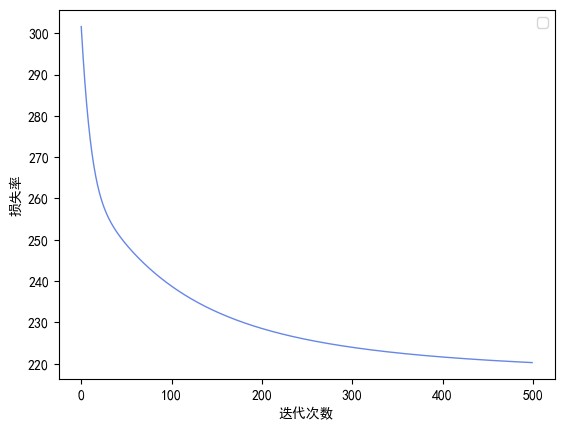

In [2908]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
sum = 0
count = 0
for i in range(len(y_test)):
    if y_test[i] == pred[i]:
        count += 1
    sum += 1

print(count / sum)
import pylab as pl

pl.mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文

x_axis_data = list(range(times + 1))[0:500]
# print(x_axis_data)
# print(loss)
y_axis_data = loss[0:500]

# plot中参数的含义分别是横轴值，纵轴值，线的形状，颜色，透明度,线的宽度和标签
plt.plot(x_axis_data, y_axis_data, color='#4169E1', alpha=0.8, linewidth=1)

# 显示标签，如果不加这句，即使在plot中加了label='一些数字'的参数，最终还是不会显示标签
plt.legend(loc="upper right")
plt.xlabel('迭代次数')
plt.ylabel('损失率')

plt.show()



In [2909]:
print(count / sum)
print(df.head())

0.8378378378378378
   Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0      0.0000            0.0           0.0705             0.0000   
1      0.3333            0.0           0.0548             0.0362   
2      0.0000            1.0           0.0353             0.0000   
3      0.0000            0.0           0.0301             0.0566   
4      0.0000            0.0           0.0724             0.0000   

   Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0            0.7436             1.0            1.0          1.0  
1            0.7436             1.0            0.0          0.0  
2            0.7436             1.0            1.0          1.0  
3            0.7436             1.0            1.0          1.0  
4            0.7436             1.0            1.0          1.0  
